# **Read data**

In [ ]:
# Import pandas, numpy
import pandas as pd
import numpy as np

In [ ]:
# Read data file
df_social = pd.read_csv("/content/facebook_combined.txt", header=None)
df_social

,0
0,0 1
1,0 2
2,0 3
3,0 4
4,0 5
...,...
88229,4026 4030
88230,4027 4031
88231,4027 4032
88232,4027 4038


In [ ]:
# Check columns of dataframe
df_social.columns

Int64Index([0], dtype='int64')

In [ ]:
# Split column and add name of column
df_social["FromUser"] = df_social[0].str.split(" ").str[0]
df_social["ToUser"] = df_social[0].str.split(" ").str[1]

# Drop column 0
df_social.drop(0, inplace = True, axis = 1)

# Recheck data
df_social

,FromUser,ToUser
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


# **Visualize data**

In [ ]:
# Import networkx, matplotlib.pylot
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

### **1. Visualize a sample graph dataset**

In [ ]:
# Create a sample graph dataset
test_data = df_social.sample(n=20)
test_data

,FromUser,ToUser
2092,107,1319
71838,2748,3252
62907,2323,2409
49004,2059,2229
12339,917,1018
80457,3116,3258
34477,1589,1819
80877,3149,3174
43444,1971,2154
38830,1912,2127


In [ ]:
friendships = {}

# Create friendships dict
for index, row in test_data.iterrows():
    from_user = row['FromUser']
    to_user = row['ToUser']

    # Check if the FromUser is already a key in the dictionary
    if from_user in friendships:
        friendships[from_user].append(to_user)
    else:
        friendships[from_user] = [to_user]

# Print the friendships dictionary
for node, friends in friendships.items():
    print(f"{node}: {friends}")


107: ['1319']
2748: ['3252']
2323: ['2409']
2059: ['2229']
917: ['1018']
3116: ['3258']
1589: ['1819']
3149: ['3174']
1971: ['2154']
1912: ['2127']
708: ['827']
2414: ['2460']
1610: ['1746']
2328: ['2420']
2686: ['2871']
1164: ['1520']
2257: ['2307']
1948: ['2135']
2165: ['2423']
1577: ['2289']


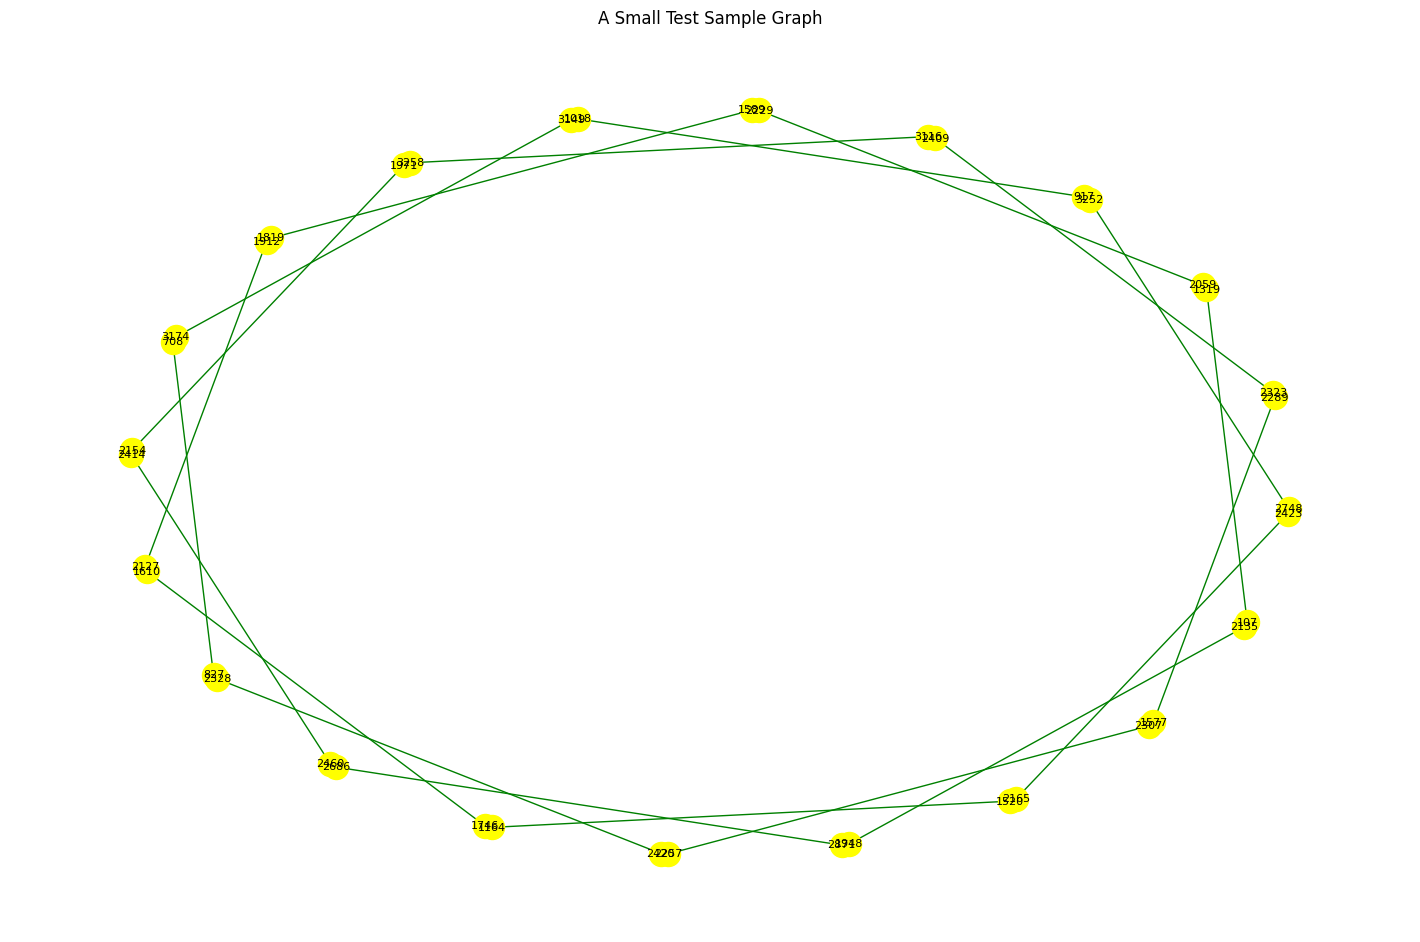

In [ ]:
# Create a new graph using networkx
G1 = nx.Graph()

# Add edges to the graph from pairs of values in the "test_data" dataframe
# Use zip to create pairs of (FromUser, ToUser)
G1.add_edges_from(zip(test_data['FromUser'], test_data['ToUser']))

# Draw the graph
# Determine the positions of the nodes using Kamada-Kawai layout
layout = nx.kamada_kawai_layout(G1)

fig = plt.figure(figsize=(14, 9))

nx.draw(G1,
        with_labels = True,
        node_size = 300,
        node_color = 'yellow',
        pos = layout,
        edge_color = 'g',
        font_size = 8,
        font_family = 'sans-serif')
fig.set_facecolor('w')
plt.title("A Small Test Sample Graph")

# Show the graph
plt.show()

### **2. Visualize High-Degree Nodes**

In [ ]:
# Create a new graph using networkx
G2 = nx.Graph()

# Add edges to the graph from pairs of values in the "test_data" dataframe
# Use zip to create pairs of (FromUser, ToUser)
G2.add_edges_from(zip(df_social['FromUser'], df_social['ToUser']))

# Calculate the degree of each node in the graph
node_degrees = G2.degree()

# Sort nodes based on degree in descending order
sorted_nodes_by_degree = sorted(node_degrees, key=lambda x: x[1], reverse=True)

# Select the top nodes with the highest degree for visualization
top_degree_nodes = [node[0] for node in sorted_nodes_by_degree[:50]]
print("Top degree nodes:", top_degree_nodes)

Top degree nodes: ['107', '1684', '1912', '3437', '0', '2543', '2347', '1888', '1800', '1663', '1352', '2266', '483', '348', '1730', '1985', '1941', '2233', '2142', '1431', '1199', '1584', '2206', '1768', '2229', '2410', '2611', '1086', '1589', '2047', '2218', '2078', '1993', '2123', '1746', '2464', '1827', '2240', '2507', '2560', '2244', '1983', '2309', '1126', '2088', '2131', '2340', '2602', '2324', '2369']


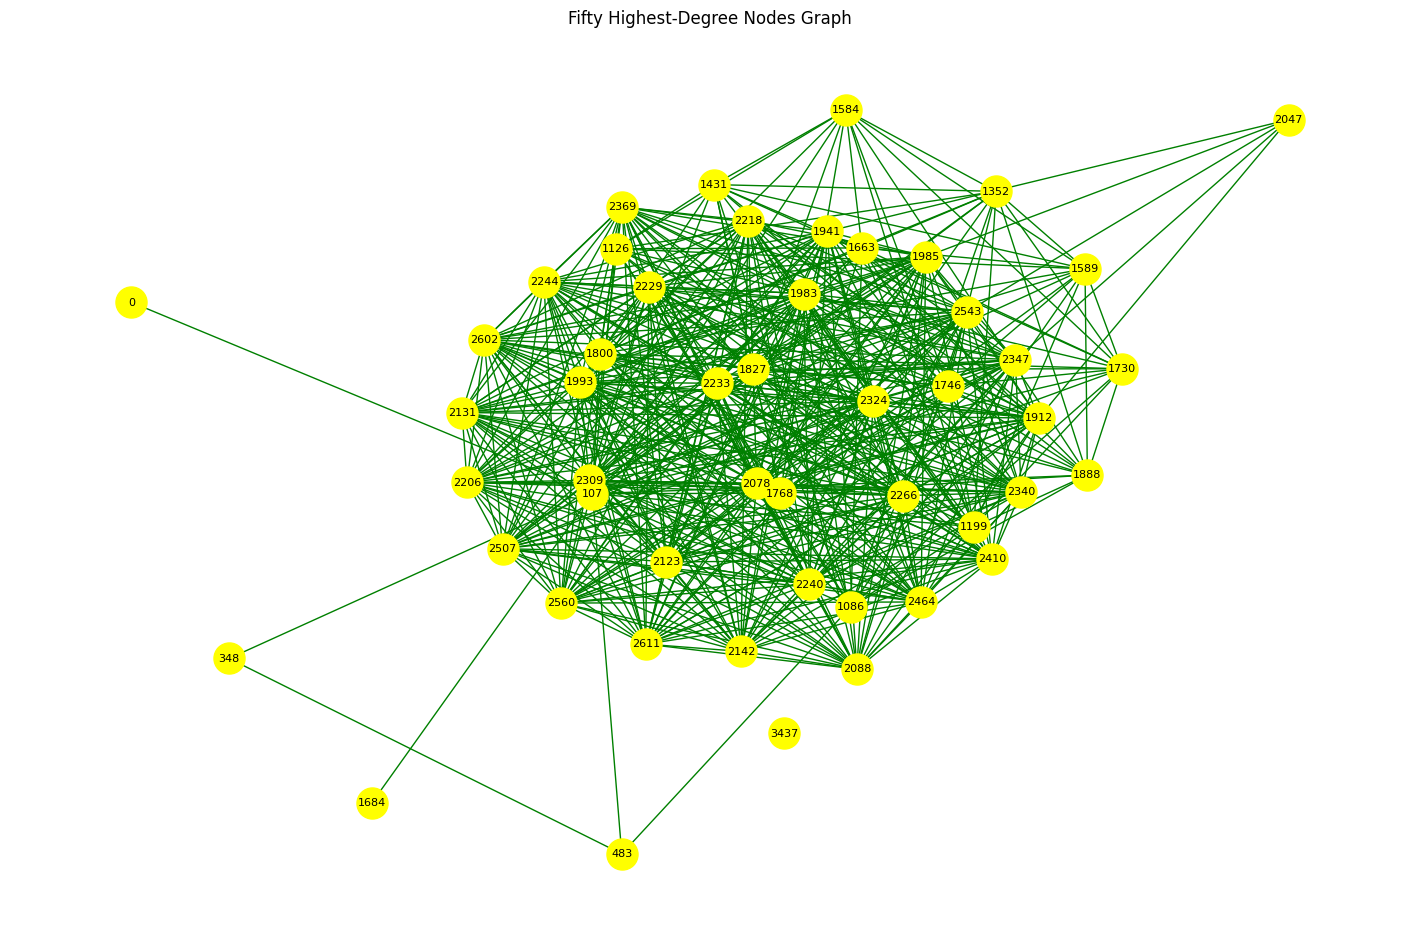

In [ ]:
# Create a subgraph containing only nodes with the highest degrees
subgraph = G2.subgraph(top_degree_nodes)

# Determine the positions of nodes using Kamada-Kawai layout
layout = nx.kamada_kawai_layout(subgraph)

# Draw the graph
fig = plt.figure(figsize=(14, 9))

nx.draw(subgraph,
        with_labels = True,
        node_size = 500,
        node_color = 'yellow',
        pos = layout,
        edge_color = 'g',
        font_size = 8,
        font_family = 'sans-serif')

fig.set_facecolor('w')

plt.title("Fifty Highest-Degree Nodes Graph")
# Show the graph
plt.show()

# **Export data**

In [ ]:
df_social.to_csv("/content/facebook_combined.csv", header = None, index = False)